# Multi-variate linear regression

# 1. Definition and parameter estimation

As we remember linear model between single real-value regressor $x$ and output variable $y$ is expressed by 
$$
y=w_1 x + w_0 +\varepsilon.
$$
$w_1$-slope coefficient, $w_0$ - intercept, $\varepsilon$ - random noise. In a more general case when $x$ is a real-valued $n x 1$-vector $x=(x_1,x_2,...,x_n)$, the model could be easily generalized as
$$
y=\sum\limits_j w_j x_j +\varepsilon
$$
or in a vector form
$$
y=w^T x+\varepsilon, \hspace{5ex} (1)
$$
where $w=(w_1,w_2,...,w_n)$ is also a $n x 1$-vector. 
Notice that intercept is not specifically separated as it could be always introduced by adding a dummy variable $x^m\equiv 1$.

The probabilistic view on the model in the assumption that $\varepsilon\sim {\cal N}(0,\sigma^2)$ is
$$
p(y|x,w,\sigma)={\cal N}(y|w^T x,\sigma^2).
$$

Given a training set $X=\{(x_j^i), j=1..n, i=1..N\}$, $Y=\{(y^i), i=1..N\}$ (further also denote columns of $X$ as $X_j=\{(x_j^i), i=1..N\}$), the least square optimization criteria for inferring a vector of coefficients $w$ can be written as
$$
RSS(w)=\sum\limits_i \varepsilon_i^2=\sum\limits_i (y^i-w^T x^i)^2. \hspace{5ex} (2)
$$
or in a matrix form:
$$
RSS(w)=(Y-X w)^T(Y-X w).
$$
Then finding an estimate
$$
\hat{w}=argmin_w RSS(w)
$$
can be done by solving the system (in a matrix form)
$$
0=\frac{\partial RSS(\hat{w})}{\partial w}=2X^T (Y-X \hat{w}).
$$
Using matrix formalism the solution could be expressed as
$$
\hat{w}=\left(X^T X\right )^{-1}X^T Y. \hspace{5ex} (3)
$$
This assumes that $X^T X$ is non-singular. Otherwise we have a case of multicollinearity which will be considered during the second session.

The max-likelihood criteria:
$$
\prod\limits_i p(y^i|x^i,w,\sigma)\to \max.
$$
or
$$
\log\left(\prod\limits_i p(y^i|x^i,w,\sigma)\right)=\sum\limits_i \log\left({\cal N}(y^i|w^T x^i,\sigma^2)\right)=
$$$$
=-\sum\limits_i \frac{(y^i-w^T x^i)^2}{2\sigma^2}- N \log(\sigma)-N \log(\sqrt{2\pi})=-\frac{RSS(w)}{2\sigma^2}-N \log(\sigma)-N \to\max
$$
Which is in turn equivalent to
$$
RSS(w)\to \min,
$$
i.e. least-square criteria plus (just like in case of the bi-variate regression)
$$
\frac{RSS(\hat{w})}{2\sigma^2}+N\log(\sigma)\to\min,
$$
i.e. the estimate $\hat{\sigma}$ could be found as
$$
\frac{\partial\left[\frac{RSS(\hat{w})}{2\sigma^2}+N\log(\hat{\sigma})\right]}{\partial \hat{\sigma}}=0,
$$$$
-\frac{RSS(\hat{w})}{\hat{\sigma}^3}+\frac{N}{\hat{\sigma}}=0,
$$$$
\hat{\sigma}^2=\frac{RSS(\hat{w})}{N}. \hspace{5ex} (4)
$$

Also an unbiased adjusted estimate is know to be
$$
\hat{\sigma}^2=\frac{RSS(\hat{w})}{N-n}. \hspace{5ex} (4')
$$

# 2. Geometry of Least Squares

According to (3), model estimates $\hat{Y}$ corresponding to the given points in $X$ are
$$
\hat{Y}=X \hat{w}=X(X^T X)^{-1}X^T Y.
$$
This way matrix $H=X(X^T X)^{-1}X^T$ performs an ortogonal projection $HY$ of a given vector of observations $Y$ onto the linear space of all possible linear combinations of columns of $X$.

In [17]:
import numpy as np
from numpy import random
from scipy import stats
import matplotlib.pyplot as plt
%pylab inline
import pandas as pd
import statsmodels.formula.api as smf
import urllib
url = "https://serv.cusp.nyu.edu/files/ADS-2015/MorningSection/lab3/L3.csv"
f = urllib.urlopen(url)
data = pd.read_csv(f , index_col=0 )
data.head()

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


,y,x1,x2,x3,x4,x5
1,0.891224,11.310117,7.304922,25.138700,51.186434,12.365874
2,1.529763,28.867388,-2.097258,15.338794,-14.225474,33.227090
3,0.720653,7.622209,8.467495,32.239993,-40.313527,10.333777
4,0.953661,17.399920,-4.881389,56.865684,52.465955,18.922631
5,-2.605897,-6.241537,-9.394398,22.004642,58.642567,-7.759056


In [18]:
validation=data[70:99]
data=data[0:69]

In [19]:
X=np.matrix(pd.DataFrame({'intercept':[1]*len(data.x1),'x1':data.x1,'x2':data.x2,'x3':data.x3,'x4':data.x4,'x5':data.x5}))
Y=np.matrix(data.y).transpose()
w=pow((X.transpose()*X),-1)*X.transpose()*Y
print(w)

[[ -1.68381195e+00]
 [  4.02509812e-02]
 [  5.69635784e-02]
 [  2.08310806e-02]
 [  5.71625250e-04]
 [  5.67660653e-02]]


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     310.7
Date:                Sat, 03 Oct 2015   Prob (F-statistic):           5.42e-43
Time:                        19:55:59   Log-Likelihood:                 10.821
No. Observations:                  69   AIC:                            -9.643
Df Residuals:                      63   BIC:                             3.762
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -1.6838      0.062    -27.096      0.0

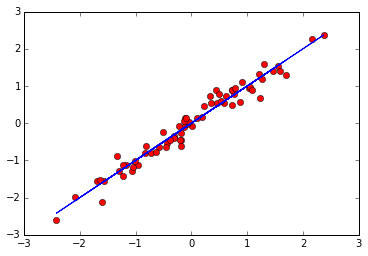

In [20]:
lm = smf.ols(formula='y ~ x1+x2+x3+x4+x5', data = data).fit()
print(lm.summary())
lmy = lm.predict(data)
plt.plot(lmy,data.y,'or')
plt.plot(lmy,lmy,'-b')   

# 3 Explanations of regression statistics

### R-squared

In the same way as for the bi-variate regression:
$$
R^2=1-\frac{RSS}{\sum\limits_i (y_i-\overline{y})^2}=\frac{\sum\limits_i (\hat{y}_i-\overline{y})^2}{\sum\limits_i (y_i-\overline{y})^2},
$$
where $\overline{y}=\sum\limits_i y_i$ is the sample mean of observed values of responce variable. This way $R^2$ is often interpreted as a fraction of responce variable's variance explained by linear model. $R^2=1$ is equivalent to $RSS=0$, i.e. the model fits the observations exactly, i.e. responce variable depends linearly on the explaining variables. On the other hand, $R^2=0$ means that the model always predicts the sample mean $\overline{y}$, i.e. explaining variables $x$ have no effect on responce variable $y$. 

Least-square criteria is equivalent to maximizing $R^2$.

### Confidence intervals
As before uncertainty of the model predictions comes together with the uncertainty of the model coefficients' estimates $\hat{w}$. The last, treated as a random vector has a variance-covariance matrix 
$$
Var(\hat{w})=(X^T X)^{-1}\sigma^2,
$$
while for $\sigma^2$ we can use one of the estimates (4) or (4') - usually the last unbiased one.

Based on this estimate as well as the normality of $\hat{w}$ distribution, the confidence intervals for each $\hat{w}_j$ are constructred (i.e. ranges containing the "true" value of $w_j$ with a certain level of confidence $1-\alpha$.

### Hypothesis testing: P-values, t-statistics and F-statistics

For each estimate $\hat{w}_i$ and the hypothesized value $w_i^*$ (often $w_i^*=0$), the corresponding $t$-statistics is defined as
$$
t=\frac{w_i^*-\hat{w}_i}{\sqrt{Var[\hat{w}_i]}}.
$$
Based on the value of $t$-statistics, which is known to follow Students distribution (approximately normal for large $N$), the $p$-value is defined to show our confidence that the observed deviation of the estimate $\hat{w}_i$ from a hypothesized value $w_i^*$ is simply a matter of chance (specifically it denotes a probabiity of having the absolute value of the $t$-statistics for the true value $w_i$ modulo higher than the observed one. 

This way once $p$-value (confidence level for the hypothesis) is lower than a certain threshold (typically $5\%$), the hypothesis of having the true value of $w_i$ to be $w_i^*$ is rejected.

The most common example is assuming a null-hypothesis $w_i^*=0$, meaning that explaining variable $x_i$ has actually no impact on the response variable $y$. Those $p$-values for the null-hypothesis are reported by R and python for every regressor $x_i$ in order to show if the impact of the considered regressor is statistically significant. 

In the same way as for the bi-variate regression, low $p$-values do not prove that: 1) impact of $x_i$ on $y$ is actually linear, or that 2) the estimate we have for the coefficient $w_i$ is the true one. In turn, having high value of $p$-value by itself does not prove that $y$ is independent on $x_i$ (first of all linear effect could be there, just disguised by noise, second - the effect could be non-linear).

Regressors having high $p$-values are usually excluded from the model in order to stay free from the random insignificnt effects, reducing the risk of overfitting (this is however not the only way of fighting it).

However often we need to test the significance of a subgroup of regressors together (or all of the regressors) testing the entire model against the null-hypothesis that a model based on a smaller subset of $m$ regressors (or just the intercept) of the regressors actually performs not worse than the original one.  The following $F$-statistics helps with that:
$$
F=\frac{(RSS_0-RSS_1)(N-n)}{RSS_1\cdot (n-m)},
$$
where $RSS_1$ is the optimal (least-square) $RSS$ value for the original regression and $RSS_0$ - is the optimal $RSS$ value of the regression based on the considered subset of $m$ regressors (testing the hypothesis that only those $m$ regressors are significant). R and python will report the value of $F$ for the null-hypothesis that only the intercept is significant, as well as the $p$-value characterizing this $F$-statistics.



0.35034933666


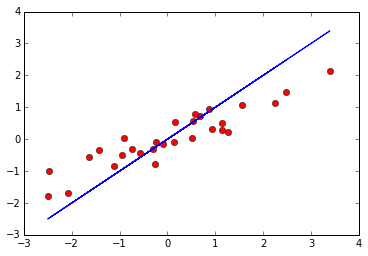

In [21]:
lmy = lm.predict(validation)
plt.plot(lmy,validation.y,'or')
plt.plot(lmy,lmy,'-b')
R2=1-sum(pow(lmy-validation.y,2))/sum(pow(validation.y-mean(validation.y),2))
print(R2)

In [22]:
lm2 = smf.ols(formula='y ~ x1+x2+x3', data = data).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     504.2
Date:                Sat, 03 Oct 2015   Prob (F-statistic):           6.15e-45
Time:                        19:56:21   Log-Likelihood:                 8.9055
No. Observations:                  69   AIC:                            -9.811
Df Residuals:                      65   BIC:                           -0.8745
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -1.6639      0.060    -27.581      0.000        -1.784    -1.543
x1             0.1024      0.004     24.394      0.000         0.094     0.111
x2             0.0602      0.003     23.206      0.000         0.055     0.065
x3             0.0219      0.001     16.730      0.000         0.019     0.025
==============================================================================
Omnibus:                        0.939   Durbin-Watson:                   2.253
Prob(Omnibus):                  0.625   Jarque-Bera (JB):                0.890
Skew:                          -0.266   Prob(JB):                        0.641
Kurtosis:                       2.835   Cond. No.                         83.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

0.93761137509


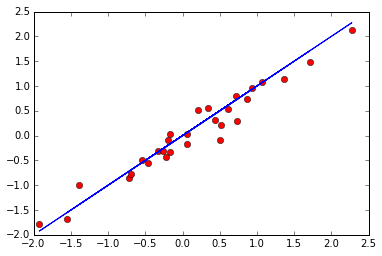

In [23]:
lmy2 = lm2.predict(validation)
plt.plot(lmy2,validation.y,'or')
plt.plot(lmy2,lmy2,'-b')
R2=1-sum(pow(lmy2-validation.y,2))/sum(pow(validation.y-mean(validation.y),2))
print(R2)

#### 4. Feature scaling

Often in order to get some sense out of the values of $w_j$ one might want to normalize the features first, brinding them on the same scale. For example one can standardszation, transforming independent variables into their standard scores (also called z-scores, normal scores):
$$
x_j^*=\frac{x_j-\overline{x}_j}{\sigma_j}
$$
where $\overline{x}_j=E[X_j]$ and $\sigma_j=std[X_j]$ are the corresponding sample mean and standard deviation. This however does not apply to a constant dummy variable corresponding to the intercept term if present. One might omit this dummy variable in case if responce variable is also standardized (then it's mean is also zero and there is no need for an intercept). 

Then, the resulting coefficients $\hat{w}_j$ could be interpreted as a relative (or absolute if the output variable is also standardized) strength of each regressor's impact on the responce variable $x_j$.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     701.8
Date:                Sat, 03 Oct 2015   Prob (F-statistic):           3.87e-65
Time:                        20:17:37   Log-Likelihood:                 14.729
No. Observations:                 100   AIC:                            -21.46
Df Residuals:                      96   BIC:                            -11.04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -3.469e-18      0.021  -1.63e-16      1.000        -0.042     0.042
x1             0.6292      0.021     29.522      0.000         0.587     0.672
x2             0.6303      0.021     29.571      0.000         0.588     0.673
x3             0.4040      0.021     18.955      0.000         0.362     0.446
==============================================================================
Omnibus:                        0.658   Durbin-Watson:                   2.293
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.592
Skew:                          -0.185   Prob(JB):                        0.744
Kurtosis:                       2.925   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

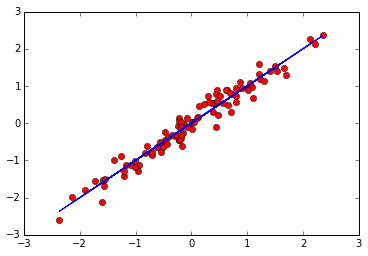

In [25]:
f = urllib.urlopen(url)
data = pd.read_csv(f , index_col=0 )
data.x1=(data.x1-mean(data.x1))/std(data.x1)
data.x2=(data.x2-mean(data.x2))/std(data.x2)
data.x3=(data.x3-mean(data.x3))/std(data.x3)
#data.x4=(data.x4-mean(data.x4))/std(data.x4)
#data.x5=(data.x5-mean(data.x5))/std(data.x5)
lm = smf.ols(formula='y ~ x1 + x2 + x3', data = data).fit()
lmy = lm.predict(data)
plt.plot(lmy,data.y,'or')
plt.plot(lmy,lmy,'-b') 
lm.summary()

##### 5. Case of orthogonal regressors

Consider a particular case of orthogonal regressors. I.e. suppose that for each pair of $j\neq k$ the inner product equals to zero: $<X_j,X_k>=X_j^T X_k=\sum\limits_i x_j^i x_k^i=0$. For the standardized regressors orthogonality is equivalent to being uncorrelated; more generally if at least one of the regressors $x_j$ is standardized (consequently $E[X_j]=0$) then:
$$
0=corr[X_j,X_k]=\frac{Cov[X_j,X_k]}{std[X_j]std[X_k]}=\frac{<X_j,X_k>/N-E[X_j]E[X_k]}{std[X_j]std[X_k]}=\frac{<X_j,X_k>}{N std[X_j]std[X_k]}.
$$
In that case it is possible to show that least square estimate for the multiple regression could be built from a set of univariate regressions of $y$ vs each of the regressors $x_j$ taken separately. Then
$$
\hat{w_j}=\frac{X_j^T Y}{X_j^T X_j}.
$$
If $X_j$ is also standardized, so that $E[X_j]=0$ and $Var[X_j]=1$, the above could be re-written as
$$
\hat{w_j}=Cov[X_j,Y].
$$
Also this way 
$$
Var[Y]=Var[\varepsilon]+\sum_j Var[w_j X_j]=\sigma^2+\sum_j w_j^2.
$$
This gives a very intuitive interpretation of the regression coefficients (or actually their squares) as a decomposition of the explained part of responce variable's variation $Var[Y]-\sigma^2$. 

However this works only for the basic least-square estimates $w=\hat{w}$, $\sigma=\hat{\sigma}$. While depending on the estimation technique used for $\hat{w}$ and $\hat{\sigma}$ (like using unbiased estimates for example), this equation might only hold approximately.

If $Y$ is also standardized then $\hat{w_j}=corr[X_j,Y]$, i.e. coefficients of such a regression are simply the correlation coefficients of observed sample of responce variable vs each of the regressors. So basically the multivariate regression with ortognal standardized regressors and standardized responce variable could be expressed as
$$
y=\sum\limits_j corr[X_j,Y] x_j+\varepsilon.
$$
This way the regression coefficients are simply the correlations between corresponding regressors and the responce variable's observations.

Although the case of ortogonal (uncorrelated) regressors seems to be quite a special one, during the next session, we'll see that actually every regression could be transformed to such a case through a principle component decomposition.


In [10]:
X=np.matrix(data)
cov=(X[:,1:4]).transpose()*(X[:,1:4])/100
print(cov>1e-10)

[[ True False  True]
 [False  True  True]
 [ True  True  True]]


In [10]:
w1=sum(data.y*data.x1)/100
w2=sum(data.y*data.x2)/100
w3=sum(data.y*data.x3)/100
print([w1,w2,w3])
print(lm.params)

[0.62922709919908482, 0.6302734204848206, 0.40400262897736416]
Intercept    3.469447e-18
x1           6.292271e-01
x2           6.302734e-01
x3           4.040026e-01
dtype: float64


In [11]:
print(X[:,0].transpose()*X[:,1:4]/100)

[[ 0.6292271   0.63027342  0.40400263]]


In [12]:
print(std(data.y)-sum(pow(lm.resid,2))/100,sum(pow(lm.params,2)))

(0.95638945117576046, 0.95638945112596707)


# 6. Non-linear polynimial regression 

Multi-variate linear regression could be also used in order to fit non-linear models, such as polynomial one for example. If one needs to fit a dependence of 
$$
y=w_m*x^m + w_{m-1} x^{m-1} + \ldots + w_1 x + w_0+\epsilon,
$$
one way of doing that it thourgh a multi-variate regression, selecting 
$$
y\sim 1,x,x^2,\ldots,x^{m}
$$ 
as $m+1$ features. Similarly a polinomial form of several variables could be fit, like 
$$
y\sim w_{2,0}x_1^2+w_{1,1}x_1 x_2+w_{2,0}x_2^2+w_{1,0}x_1+w_{0,1}x_2+w_{0,0}
$$
could be handled over a feature space including
$$
y\sim 1,x_1,x_2,x_1^2,x_2^2,x_1 x_2.
$$

In [13]:
url2 = "https://serv.cusp.nyu.edu/files/ADS-2015/MorningSection/lab3/L32.csv"
f2 = urllib.urlopen(url2)
data2 = pd.read_csv(f2 , index_col=0 )
data2.head()

,x,y
1,0.037037,1.119662
2,1.317515,5.580618
3,0.738433,2.824372
4,1.310157,5.851272
5,0.295572,1.641788


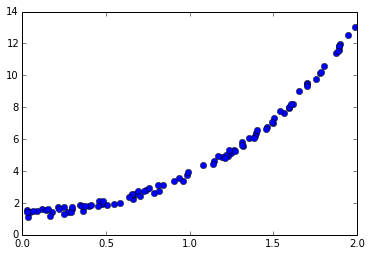

In [14]:
plt.plot(data2.x,data2.y,'o')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 1.207e+04
Date:                Mon, 28 Sep 2015   Prob (F-statistic):          5.21e-117
Time:                        07:39:39   Log-Likelihood:                 13.654
No. Observations:                 100   AIC:                            -21.31
Df Residuals:                      97   BIC:                            -13.49
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.7216      0.061     28.197      0.0

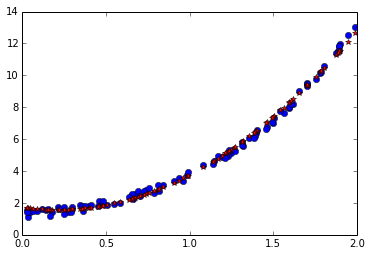

In [15]:
data2['x2']=pow(data2.x,2)
lm2 = smf.ols(formula='y ~ x+x2', data = data2).fit()
print(lm2.summary())
lmy2 = lm2.predict(data2)
plt.plot(data2.x,data2.y,'ob')
plt.plot(data2.x,lmy2,'*r') 